In [18]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import requests


In [32]:
munmx = gpd.read_file("muni.shp")


In [33]:
munmx.set_index(munmx["CVEGEO"].astype(int), inplace = True)
munmx.head(5)

,AREA,COV_,COV_ID,CVEGEO,CVE_CAB,CVE_ENT,CVE_MUN,NOM_CAB,NOM_ENT,NOM_MUN,PERIMETER,geometry
CVEGEO,,,,,,,,,,,,
1002,54337.426563,0.0,1.0,01002,0001,01,002,Asientos,Aguascalientes,Asientos,192096.427893,"POLYGON ((2500060.239199999 1133299.9901, 2500..."
1011,13777.017689,1.0,2.0,01011,0001,01,011,San Francisco de los Romo,Aguascalientes,San Francisco de los Romo,103689.065058,"POLYGON ((2485534.556000002 1117425.794000002,..."
1007,37229.516172,2.0,3.0,01007,0001,01,007,RincÃ³n de Romos,Aguascalientes,RincÃ³n de Romos,161749.880103,"POLYGON ((2480633.530000007 1149057.668199996,..."
1008,85779.057493,3.0,4.0,01008,0001,01,008,San JosÃ© de Gracia,Aguascalientes,San JosÃ© de Gracia,181537.600406,"POLYGON ((2463679.819099998 1122454.043300003,..."
1005,49989.510265,4.0,5.0,01005,0001,01,005,JesÃºs MarÃ­a,Aguascalientes,JesÃºs MarÃ­a,163500.813411,"POLYGON ((2468125.583600003 1113246.7959, 2468..."


In [34]:
#print(munmx.crs)
# Lambert conformal conic projection WGS84 is epsg =4326
#ax = munmx.to_crs(epsg=4326).plot()
#ax.set_axis_off()

In [35]:
import pandas as pd
master = pd.read_csv("master.csv", index_col = "id")
master.index.names = ['CVEGEO'] #potential problem with the id number, is not a string
master.head(10)

,Homicides in 2013,Homicide Rate in 2013,3x1 Projects Granted in 2013,ENTIDAD_y,MUNICIPIO,Homicides in 2014,pop_y,Homicide Rate in 2014,3x1 Projects Granted in 2014
CVEGEO,,,,,,,,,
1001,19.0,2.383910,6.0,AGUASCALIENTES,AGUASCALIENTES,31.0,797010.0,3.889537,6.0
1002,5.0,10.990943,2.0,AGUASCALIENTES,ASIENTOS,0.0,45492.0,0.000000,9.0
1003,0.0,0.000000,17.0,AGUASCALIENTES,CALVILLO,2.0,54136.0,3.694399,10.0
1004,0.0,0.000000,2.0,AGUASCALIENTES,COSIO,0.0,15042.0,0.000000,5.0
1005,7.0,7.028818,NaN,AGUASCALIENTES,JESUS MARIA,6.0,99590.0,6.024701,2.0
1006,1.0,2.388801,1.0,AGUASCALIENTES,PABELLON DE ARTEAGA,0.0,41862.0,0.000000,1.0
1007,2.0,4.068679,2.0,AGUASCALIENTES,RINCON DE ROMOS,1.0,49156.0,2.034340,3.0
1008,0.0,0.000000,4.0,AGUASCALIENTES,SAN JOSE DE GRACIA,0.0,8443.0,0.000000,3.0
1009,0.0,0.000000,1.0,AGUASCALIENTES,TEPEZALA,0.0,19668.0,0.000000,4.0


In [36]:
mastermap = munmx.join(master, how= "outer") #outer will keep the geometry of all the municipalities

In [47]:
mastermap.head(5)

,AREA,COV_,COV_ID,CVEGEO,CVE_CAB,CVE_ENT,CVE_MUN,NOM_CAB,NOM_ENT,NOM_MUN,...,geometry,Homicides in 2013,Homicide Rate in 2013,3x1 Projects Granted in 2013,ENTIDAD_y,MUNICIPIO,Homicides in 2014,pop_y,Homicide Rate in 2014,3x1 Projects Granted in 2014
CVEGEO,,,,,,,,,,,,,,,,,,,,,
1001,116635.923614,6.0,7.0,01001,0001,01,001,Aguascalientes,Aguascalientes,Aguascalientes,...,"POLYGON ((2489959.177600002 1111683.058800004,...",19.0,2.383910,6.0,AGUASCALIENTES,AGUASCALIENTES,31.0,797010.0,3.889537,6.0
1002,54337.426563,0.0,1.0,01002,0001,01,002,Asientos,Aguascalientes,Asientos,...,"POLYGON ((2500060.239199999 1133299.9901, 2500...",5.0,10.990943,2.0,AGUASCALIENTES,ASIENTOS,0.0,45492.0,0.000000,9.0
1003,92335.783202,9.0,10.0,01003,0001,01,003,Calvillo,Aguascalientes,Calvillo,...,"POLYGON ((2440783.883699994 1105688.003400005,...",0.0,0.000000,17.0,AGUASCALIENTES,CALVILLO,2.0,54136.0,3.694399,10.0
1004,12838.354552,10.0,11.0,01004,0001,01,004,CosÃ­o,Aguascalientes,CosÃ­o,...,"POLYGON ((2474059.8709 1150395.9081, 2474143.2...",0.0,0.000000,2.0,AGUASCALIENTES,COSIO,0.0,15042.0,0.000000,5.0
1005,49989.510265,4.0,5.0,01005,0001,01,005,JesÃºs MarÃ­a,Aguascalientes,JesÃºs MarÃ­a,...,"POLYGON ((2468125.583600003 1113246.7959, 2468...",7.0,7.028818,NaN,AGUASCALIENTES,JESUS MARIA,6.0,99590.0,6.024701,2.0


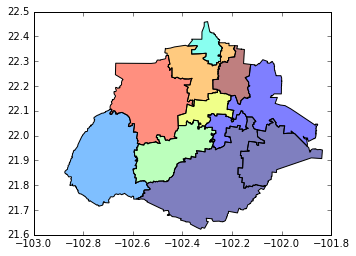

In [42]:
#geo_hom_3x1["id"] = geo_hom_3x1["CVEGEO"].str.lower()
#counties = counties[counties["STATEFP"] == "42"].set_index("lname")
ags = mastermap[mastermap["CVE_ENT"] == "01"].set_index("CVEGEO") #, inplace= True)

/Users/malicia/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


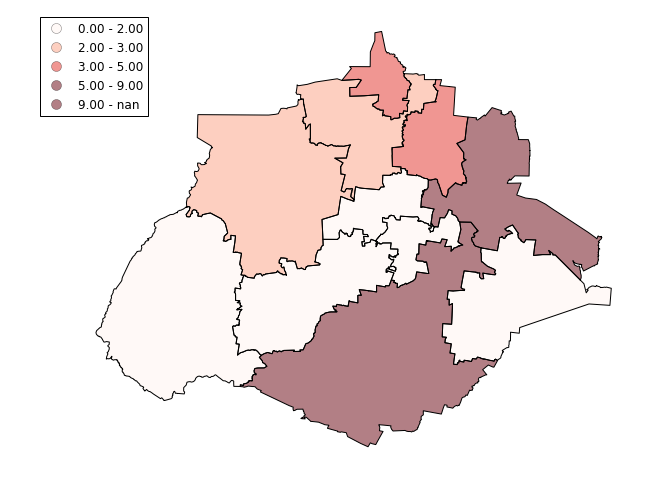

In [46]:
ft = "3x1 Projects Granted in 2014"
ax = ags.to_crs(epsg=4326)

ax = ax.plot(scheme = "Quantiles", k = 5, 
             column = ft, figsize = (12, 8), 
             legend = True, cmap = "Reds")
ax.set_axis_off()

In [ ]:
ft = "Homicide Rate in 2013"
ax = ags.to_crs(epsg = 4326).plot(scheme = "EQUAL_INTERVAL", k = 5, column = ft, 
                                     figsize = (16, 10), legend = True, cmap = "rainbow")

ax.set_axis_off()

In [ ]:
import pysal as ps
import folium
import matplotlib.pyplot as plt

m = folium.Map([29.5, -102], 
               tiles='cartodbpositron', 
               zoom_start = 4, min_zoom = 4)

with open('census.geojson', 'w') as f: f.write(geo_hom_3x1.to_json())

ft = "Homicide Rate in 2013"
threshold_scale = list(ps.esda.mapclassify.Quantiles(geo_hom_3x1[ft], k = 5).bins)
threshold_scale = [geo_hom_3x1[ft].min()] + threshold_scale[:-1] + [0.1 + geo_hom_3x1[ft].max()]

m.choropleth(geo_path = "census.geojson", 
             data = geo_hom_3x1, 
             columns = ['CVEGEO', 'Homicide Rate in 2013'],
             threshold_scale = threshold_scale,
             key_on='feature.properties.CVEGEO',
             fill_opacity = 0.7, line_opacity=0.5,
             fill_color = 'YlGn',
             legend_name='Homicide Rate in 2013')

m.save("mx.html")
m